# Data Science and Business Analytics:GRIPJUNE21-TSF


# Task-2: Prediction using Unsupervised ML

#Author: Shruti Raina

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Loading and Reading Iris Dataset**

In [5]:
s_data=pd.read_csv('Iris.csv')
print(s_data.shape)   #to check the dimensions of the dataset
s_data.head()   #to get the top five rows of the dataset

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Checking for Null values**

In [6]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no null values in the data set.

**Summary Statistics**

In [7]:
s_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Determining the unique species**

In [8]:
s_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So there are 3 species of Iris.Let now us check their count.

In [9]:
s_data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**Dropping columns of no use**

In [10]:
data=s_data.drop('Id',axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Visualising the Data**

In [11]:
import seaborn as sns

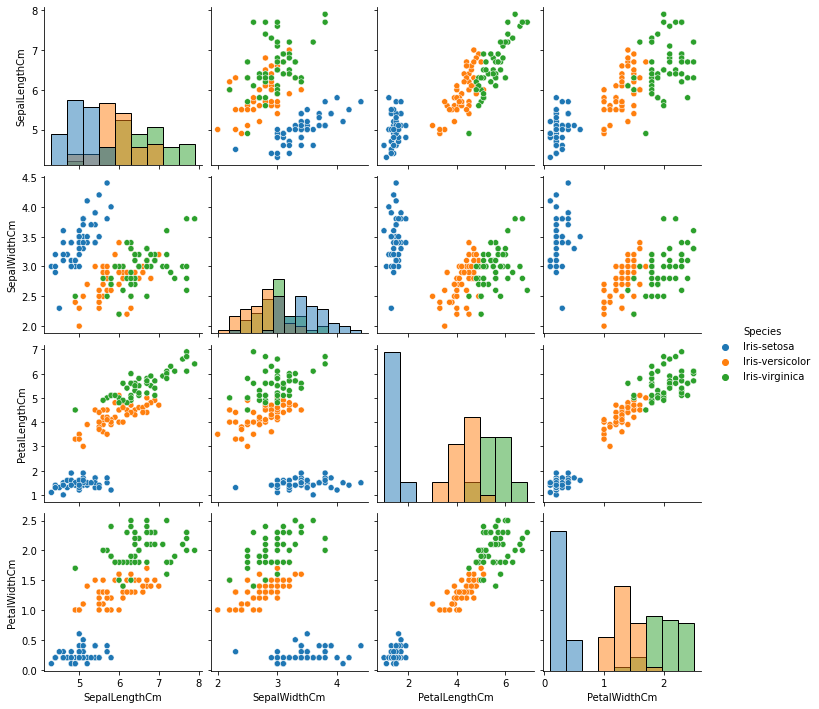

In [12]:
sns.pairplot(data,hue='Species',diag_kind='hist')

Visualising the scatter plot between sepal length and sepal width.

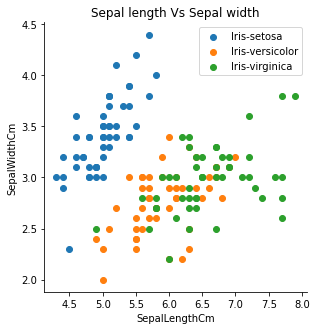

In [13]:
sns.FacetGrid(data,hue='Species',height=4.5).map(plt.scatter,'SepalLengthCm','SepalWidthCm')
plt.title('Sepal length Vs Sepal width')
plt.legend()
plt.show()

Visualising the scatter plot between petal length and petal width.

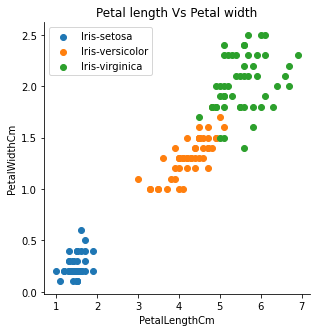

In [14]:
sns.FacetGrid(data,hue='Species',height=4.5).map(plt.scatter,'PetalLengthCm','PetalWidthCm')
plt.title('Petal length Vs Petal width')
plt.legend()
plt.show()

Checking the correaltion between the variables and plotting them using heatmap.

In [15]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


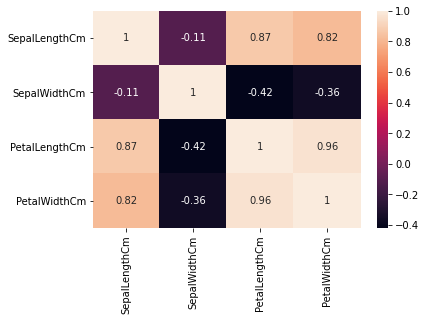

In [16]:
sns.heatmap(data.corr(),annot=True)

**Using K-means Clustering Algorithm**

In [17]:
x = data.iloc[:, :4].values  #creating array for model to train and perform clustering

In [18]:
from sklearn.cluster import KMeans
wcss = []  # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', #using kmeans++ for choosing the initial values for the k-means clustering algorithm.
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Using Elbow Method for finding the optimum number of clusters for k-means classification.**

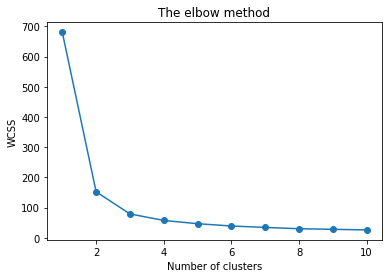

In [19]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

From the above graph we can clearly see that the elbow occur i.e. where the graph becomes parallel to x-axis, at the point 3.So the optimum number of clusters is 3.

**Model Training**

We are going to train the model with 3 optimum clusters. Creating the kmeans classifier.

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

**Visualising the Clusters along with the centroids of each cluster.**

Firstly we will visualise clusters on the basis of 'Sepal Length' and 'Sepal Width'.

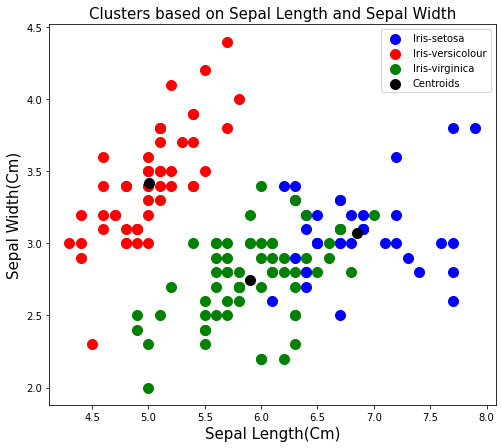

In [21]:
plt.figure(figsize=(8,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters based on Sepal Length and Sepal Width',size=15)
plt.xlabel('Sepal Length(Cm)',size=15)
plt.ylabel('Sepal Width(Cm)',size=15)
plt.legend(loc='upper right')
plt.show()

Now we will visualise clusters on the basis of 'Petal Length' and 'Petal Width'.

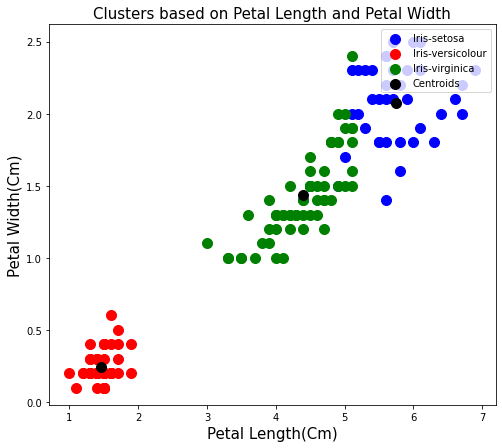

In [22]:
plt.figure(figsize=(8,7))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3],s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters based on Petal Length and Petal Width',size=15)
plt.xlabel('Petal Length(Cm)',size=15)
plt.ylabel('Petal Width(Cm)',size=15)
plt.legend(loc='upper right')
plt.show()

**From the above scatter plots we can clearly visualise the 3 clusters where black dots represent centrois of each cluster.**

# Thank You!